# Net Flows Regression

## Importing Dataframes

In [1]:
import pandas as pd
import numpy as np

In [2]:
excel_file_path = 'Merger_information.xlsx'

all_dfs = pd.read_excel(excel_file_path, sheet_name=None)

In [3]:
print("Worksheet names:", list(all_dfs.keys()))

Worksheet names: ['fees', 'fees_merged', 'fees_non_merged', 'financial_performance', 'financial_merged', 'financial_non_merged', 'fund_profile', 'fund_profile_merged', 'fund_profile_non_merged']


In [4]:
Financial_Merged = all_dfs['financial_merged']
Financial_Non_Merged = all_dfs['financial_non_merged']
Fund_Profile_Merged = all_dfs['fund_profile_merged']
Fund_Profile_Non_Merged = all_dfs['fund_profile_non_merged'] 

In [5]:
Fund_Profile_Merged

,Period,Fund name,ABN,Merger,Merged,Acquirer,RSE Regulatory classification,Fund type,RSE Membership base,Fund's RSE licensee,...,Net members' benefits outflow ratio,Investment expenses ratio,Operating expense ratio,One-year\nrate of return,Five-year\nrate of return,Ten-year\nrate of return,Total number of member accounts,Total members' benefits,Average member account balance,Growth in number of member accounts
0,2022-06-30,Australian Retirement Trust,60905115063,1,0,NaN,Public offer,Industry,General base,Australian Retirement Trust Pty Ltd,...,0.063,0.002,0.002,-0.047,0.04700,0.07100,2216337.0,224180291.0,101.0,2.58
1,2021-06-30,equipsuper,33813823017,1,0,NaN,Public offer,Industry,General base,Togethr Trustees Pty Ltd,...,0.072,0.002,0.001,0.112,0.07787,0.07717,148613.0,29584840.0,199.0,1.09
2,2019-06-30,Smart Future Trust,68964712340,1,0,NaN,Public offer,Retail,General base,Equity Trustees Superannuation Limited,...,0.278,0.001,0.011,0.116,0.08215,0.08278,183662.0,5212887.0,28.0,0.40
3,2019-06-30,Russell Investments Master Trust,89384753567,1,0,NaN,Public offer,Retail,Corporate base,Total Risk Management Pty Limited,...,0.834,0.001,0.003,0.061,0.06506,0.07620,95618.0,9277851.0,97.0,0.36
4,2019-06-30,NGS Super,73549180515,1,0,NaN,Public offer,Industry,Industry base,NGS Super Pty Limited,...,0.241,0.003,0.003,0.068,0.07878,0.07991,117824.0,11324657.0,96.0,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2021-06-30,Labour Union Co-Operative Retirement Fund,26382680883,0,1,AustralianSuper,Public offer,Industry,Industry base,L.U.C.R.F. Pty. Ltd.,...,1.304,0.004,0.004,0.178,0.07948,0.07430,133058.0,7367664.0,55.0,0.03
288,2021-06-30,Intrust Super Fund,65704511371,0,1,HOSTPLUS Superannuation Fund,Public offer,Industry,Industry base,IS INDUSTRY FUND PTY LTD,...,1.276,0.003,0.005,0.164,0.08236,0.07833,91888.0,2969144.0,32.0,-0.05
289,2021-06-30,Energy Super,33761363685,0,1,LGIAsuper,Public offer,Industry,Industry base,Electricity Supply Industry Superannuation (QL...,...,0.969,0.005,0.003,0.172,0.07800,0.07853,47848.0,8381633.0,175.0,-0.02
290,2021-06-30,Club Plus Superannuation Scheme,95275115088,0,1,AustralianSuper,Public offer,Industry,Industry base,Club Plus Superannuation Pty Ltd,...,1.331,0.004,0.005,0.146,0.07870,0.07181,60407.0,3096793.0,51.0,-0.08


In [6]:
unique_mysuper_name = Fund_Profile_Merged['Fund name'].nunique()
unique_mysuper_type = Fund_Profile_Non_Merged['Fund name'].nunique()

print("Number of unique values in 'MySuper product name':", unique_mysuper_name)
print("Number of unique values in 'MySuper product type':", unique_mysuper_type)

Number of unique values in 'MySuper product name': 41
Number of unique values in 'MySuper product type': 182


In [7]:
earliest_date = Financial_Merged['Period'].min()
latest_date = Financial_Merged['Period'].max()

print(f"Date range: {earliest_date} to {latest_date}")

Date range: 2004-06-30 00:00:00 to 2022-06-30 00:00:00


In [8]:
# Merge Financial dataframes
merged_financial = pd.concat([Financial_Merged, Financial_Non_Merged], ignore_index=True)

# Merge Fund Profile dataframes
merged_fund_profile = pd.concat([Fund_Profile_Merged, Fund_Profile_Non_Merged], ignore_index=True)

# Fill NaN values in the columns 'Merger', 'Merged', and 'Acquirer' with 0
merged_financial[['Merger', 'Merged', 'Acquirer']] = merged_financial[['Merger', 'Merged', 'Acquirer']].fillna(0)

merged_fund_profile[['Merger', 'Merged', 'Acquirer']] = merged_fund_profile[['Merger', 'Merged', 'Acquirer']].fillna(0)


In [9]:
merged_financial.columns

Index(['Period', 'Fund name', 'ABN', 'Merger', 'Merged', 'Acquirer',
       'RSE Regulatory classification', 'Fund type', 'RSE Membership base',
       'Fund's RSE licensee', 'RSE licensee ownership type',
       'RSE licensee profit status', 'RSE licensee board structure',
       'RSE Balance date', 'Duration', 'RSE Wind up date',
       'Net assets at beginning of period', 'Employer contributions ',
       'of which: Super guarantee contributions',
       'of which: Salary sacrifice contributions', 'Personal contributions',
       'Government co-contributions', 'Low income super contributions',
       'Other member contributions', 'Member contributions',
       'Defined benefit contributions', 'Contribution tax and surcharge',
       'Other members’ benefits flows in', 'Total Members' benefit flows in',
       'Inward rollovers', 'of which: SMSF rollovers',
       'of which: Successor fund transfers', 'Outward rollover',
       'of which: SMSF rollovers.1', 'of which: Successor fund 

In [10]:
merged_financial = merged_financial[['Period', 'Fund name', 'ABN', 'Merger', 'Merged', 'Acquirer','Net assets at beginning of period', "Total Members' benefit flows in", "Total Members' benefit flows out", 'Inward rollovers', 'of which: SMSF rollovers','of which: Successor fund transfers', 'Outward rollover','of which: SMSF rollovers.1', 'of which: Successor fund transfers.1', 'One-year\nrate of return']]
merged_fund_profile = merged_fund_profile [['Period', 'Fund name', 'ABN', 'Merger', 'Merged', 'Acquirer','Average member account balance']]

In [11]:
merged_df = pd.merge(merged_financial, merged_fund_profile, on=['Period', 'Fund name', 'ABN'])

In [12]:
merged_df.columns

Index(['Period', 'Fund name', 'ABN', 'Merger_x', 'Merged_x', 'Acquirer_x',
       'Net assets at beginning of period', 'Total Members' benefit flows in',
       'Total Members' benefit flows out', 'Inward rollovers',
       'of which: SMSF rollovers', 'of which: Successor fund transfers',
       'Outward rollover', 'of which: SMSF rollovers.1',
       'of which: Successor fund transfers.1', 'One-year\nrate of return',
       'Merger_y', 'Merged_y', 'Acquirer_y', 'Average member account balance'],
      dtype='object')

In [13]:
rename_columns = {
    'Merger_x': 'Merger',
    'Merged_x': 'Merged',
    'Acquirer_x': 'Acquirer',
    'Inward rollovers': 'InRoll', 
    'of which: SMSF rollovers': 'SMSFIn',
    'of which: Successor fund transfers': 'SFTIn',
    'Outward rollover': 'OutRoll',
    'of which: SMSF rollovers.1': 'SMSFOut', 
    'of which: Successor fund transfers.1': 'SFTOut', 
    'One-year\nrate of return': '1YrRet',
    'Average member account balance': 'AvgMemBal',
    "Total Members' benefit flows out": 'MemFlowOut',
    "Total Members' benefit flows in": 'MemFlowIn',
    'Net assets at beginning of period': 'NetAssets',
}

merged_df = merged_df.rename(columns=rename_columns)

## Merging Fail Dummy

In [14]:
excel_file_path = 'Merged SF Annual Data.xlsx'

all_dfs = pd.read_excel(excel_file_path, sheet_name=None)

In [15]:
# Display the keys (worksheet names) in the dictionary
print("Worksheet names:", list(all_dfs.keys()))

Worksheet names: ['Annual', 'Quarterly', 'Merger List', 'Fail', 'Sheet1']


In [16]:
fail = all_dfs['Fail']

In [17]:
fail

,Period,Fund name,ABN,Fail
0,2022-06-30,AMG Super,30099320583,1
1,2022-06-30,ASGARD Independence Plan Division Two,90194410365,1
2,2022-06-30,AvSuper Fund,84421446069,1
3,2022-06-30,Boc Gases Superannuation Fund,49620344668,1
4,2022-06-30,Christian Super,66628776348,1
5,2022-06-30,Colonial First State FirstChoice Superannuatio...,26458298557,1
6,2022-06-30,Commonwealth Bank Group Super,24248426878,1
7,2022-06-30,Energy Industries Superannuation Scheme-Pool A,22277243559,1
8,2022-06-30,Labour Union Co-Operative Retirement Fund,26382680883,1
9,2022-06-30,Maritime Super,77455663441,1


In [18]:
final_df = pd.merge(merged_df, fail, on=['Period', 'Fund name', 'ABN'], how='left')

final_df['Fail'] = final_df['Fail'].fillna(0)

final_df['AvgMemBal'] = final_df['AvgMemBal'].fillna(0)

In [19]:
final_df

,Period,Fund name,ABN,Merger,Merged,Acquirer,NetAssets,MemFlowIn,MemFlowOut,InRoll,...,SFTIn,OutRoll,SMSFOut,SFTOut,1YrRet,Merger_y,Merged_y,Acquirer_y,AvgMemBal,Fail
0,2022-06-30,Australian Retirement Trust,6.090512e+10,1.0,0.0,0,132912715,10351778,4783427,108204175,...,104788452.0,2670233,490182.0,0.0,-0.047,1.0,0.0,0,101.0,0.0
1,2021-06-30,equipsuper,3.381382e+10,1.0,0.0,0,15751360,623059,468409,12473793,...,12260795.0,474967,0.0,0.0,0.112,1.0,0.0,0,199.0,0.0
2,2019-06-30,Smart Future Trust,6.896471e+10,1.0,0.0,0,3411853,309418,178923,1951919,...,1685139.0,450718,28179.0,0.0,0.116,1.0,0.0,0,28.0,0.0
3,2019-06-30,Russell Investments Master Trust,8.938475e+10,1.0,0.0,0,8710803,359701,204232,762716,...,599124.0,731968,59330.0,0.0,0.061,1.0,0.0,0,97.0,0.0
4,2019-06-30,NGS Super,7.354918e+10,1.0,0.0,0,8975414,510764,277108,1849358,...,1611874.0,291323,30538.0,0.0,0.068,1.0,0.0,0,96.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2014-06-30,Water Corporation Superannuation Plan,1.609578e+10,0.0,0.0,0,315657,33010,9344,10961,...,0,8955,1818,0,0.114,0.0,0.0,0,0,0.0
1496,2014-06-30,Wealth Personal Superannuation and Pension Fund,9.238191e+10,0.0,0.0,0,17447226,1334736,1242631,3411065,...,0,988593,132355,0,0.106,0.0,0.0,0,0,0.0
1497,2014-06-30,Westpac Mastertrust - Superannuation Division,8.123690e+10,0.0,0.0,0,5607661,435780,175894,85492,...,0,616401,0,0,0.095,0.0,0.0,0,0,0.0
1498,2014-06-30,Worsley Alumina Superannuation Fund,5.146955e+10,0.0,0.0,0,246471,27076,1708,9749,...,0,22267,0,0,0.087,0.0,0.0,0,0,0.0


## Calculating Variables

In [20]:
# Convert columns to numeric
final_df['InRoll'] = pd.to_numeric(final_df['InRoll'], errors='coerce')
final_df['SFTIn'] = pd.to_numeric(final_df['SFTIn'], errors='coerce')
final_df['OutRoll'] = pd.to_numeric(final_df['OutRoll'], errors='coerce')
final_df['SFTOut'] = pd.to_numeric(final_df['SFTOut'], errors='coerce')
final_df['MemFlowIn'] = pd.to_numeric(final_df['MemFlowIn'], errors='coerce')
final_df['MemFlowOut'] = pd.to_numeric(final_df['MemFlowOut'], errors='coerce')
final_df['NetAssets'] = pd.to_numeric(final_df['NetAssets'], errors='coerce')

In [21]:
# Calculate net rollovers in and out
final_df['NetRollIn'] = final_df['InRoll'] - final_df['SFTIn']
final_df['NetRollOut'] = final_df['OutRoll'] - final_df['SFTOut']

In [22]:
# Calculate net flows in and out
final_df['NetFlowsIn'] = final_df['InRoll'] + final_df['MemFlowIn'] - final_df['SFTIn']
final_df['NetFlowsOut'] = final_df['OutRoll'] + final_df['MemFlowOut'] - final_df['SFTOut']

In [23]:
# Net Fund Rollovers as Percentage of Net Flows
final_df['RolloversNetFlows'] = ((final_df['NetRollIn'] - final_df['NetRollOut'])  / (final_df['MemFlowIn'] - final_df['MemFlowOut']))

In [24]:
#Above converted to %
final_df['RolloversNetFlowsPercentage'] = ((final_df['NetRollIn'] - final_df['NetRollOut']) / (final_df['MemFlowIn'] - final_df['MemFlowOut'])) * 100

In [25]:
#Net Rollovers as percentage of net rollovers + flows
final_df['RolloversFlowsPercentage'] = ((final_df['NetRollIn'] - final_df['NetRollOut']) / (final_df['NetFlowsIn'] - final_df['NetFlowsOut'])) * 100

In [26]:
#Net Rollovers / Total Assets
final_df['FlowRatio'] = (final_df['NetRollIn'] - final_df['NetRollOut'] / final_df['NetAssets'])

In [27]:
#Above converted to %
final_df['FlowRatioPercentage'] = ((final_df['NetRollIn'] - final_df['NetRollOut']) / final_df['NetAssets']) * 100

In [28]:
#Average Member Balance

final_df['AvgMemBal'] = pd.to_numeric(final_df['AvgMemBal'], errors='coerce')


In [29]:
#1 Year Return

final_df['1YrRet'] = pd.to_numeric(final_df['1YrRet'], errors='coerce')

## Limiting Time Period

In [30]:
# Ensure 'Period' column is in datetime format
final_df['Period'] = pd.to_datetime(final_df['Period'])

# Filter the dataframe for observations from 2021 to 2022
filtered_df = final_df[(final_df['Period'] >= '2020-01-01') & (final_df['Period'] <= '2022-12-31')]

In [31]:
filtered_df.columns

Index(['Period', 'Fund name', 'ABN', 'Merger', 'Merged', 'Acquirer',
       'NetAssets', 'MemFlowIn', 'MemFlowOut', 'InRoll', 'SMSFIn', 'SFTIn',
       'OutRoll', 'SMSFOut', 'SFTOut', '1YrRet', 'Merger_y', 'Merged_y',
       'Acquirer_y', 'AvgMemBal', 'Fail', 'NetRollIn', 'NetRollOut',
       'NetFlowsIn', 'NetFlowsOut', 'RolloversNetFlows',
       'RolloversNetFlowsPercentage', 'RolloversFlowsPercentage', 'FlowRatio',
       'FlowRatioPercentage'],
      dtype='object')

In [39]:
print(filtered_df['RolloversNetFlowsPercentage'].describe())

count    259.000000
mean      23.505865
std      256.316799
min     -709.453372
25%      -98.701448
50%       -1.683094
75%      162.427574
max      796.403361
Name: RolloversNetFlowsPercentage, dtype: float64


In [45]:
index_of_largest = filtered_df['Lag_1YrRet'].idxmax()
largest_row = filtered_df.loc[index_of_largest]
print(largest_row)


Period                                                       2021-06-30 00:00:00
Fund name                      CommInsure Corporate Insurance Superannuation ...
ABN                                                                49968181565.0
Merger                                                                       0.0
Merged                                                                       0.0
Acquirer                                                                       0
NetAssets                                                                   21.0
MemFlowIn                                                                 3118.0
MemFlowOut                                                                6323.0
InRoll                                                                       0.0
SMSFIn                                                                         0
SFTIn                                                                        0.0
OutRoll                     

In [37]:
# Define the fund names to be dropped
funds_to_drop = [
    "Mason Stevens Super", 
    "Crown Employees (NSW Fire Brigades Firefighting Staff Death & Disability) Superannuation Fund"
]

# Drop rows based on the condition
filtered_df = filtered_df[~filtered_df['Fund name'].isin(funds_to_drop)]


In [38]:
# For 'RolloversNetFlowsPercentage'
Q1_rollovers = filtered_df['RolloversNetFlowsPercentage'].quantile(0.25)
Q3_rollovers = filtered_df['RolloversNetFlowsPercentage'].quantile(0.75)
IQR_rollovers = Q3_rollovers - Q1_rollovers
lower_bound_rollovers = Q1_rollovers - 1.5 * IQR_rollovers
upper_bound_rollovers = Q3_rollovers + 1.5 * IQR_rollovers

# For 'FlowRatioPercentage'
Q1_flow_ratio = filtered_df['FlowRatioPercentage'].quantile(0.25)
Q3_flow_ratio = filtered_df['FlowRatioPercentage'].quantile(0.75)
IQR_flow_ratio = Q3_flow_ratio - Q1_flow_ratio
lower_bound_flow_ratio = Q1_flow_ratio - 1.5 * IQR_flow_ratio
upper_bound_flow_ratio = Q3_flow_ratio + 1.5 * IQR_flow_ratio

# Filter rows where values are within the bounds for both columns
filtered_df = filtered_df[
    (filtered_df['RolloversNetFlowsPercentage'] >= lower_bound_rollovers) &
    (filtered_df['RolloversNetFlowsPercentage'] <= upper_bound_rollovers) &
    (filtered_df['FlowRatioPercentage'] >= lower_bound_flow_ratio) &
    (filtered_df['FlowRatioPercentage'] <= upper_bound_flow_ratio)
]


In [36]:
# Define the 90th percentile threshold for both columns
threshold_rollovers = filtered_df['RolloversNetFlowsPercentage'].quantile(0.90)
threshold_flow_ratio = filtered_df['FlowRatioPercentage'].quantile(0.90)

# Filter rows where values are below the 90th percentile thresholds
filtered_df = filtered_df[
    (filtered_df['RolloversNetFlowsPercentage'] <= threshold_rollovers) &
    (filtered_df['FlowRatioPercentage'] <= threshold_flow_ratio)
]


In [37]:
from scipy.stats import mstats

# Windsorize 'RolloversNetFlowsPercentage' column at 90th percentile
filtered_df['RolloversNetFlowsPercentage'] = mstats.winsorize(filtered_df['RolloversNetFlowsPercentage'], limits=[0, 0.10])

# Windsorize 'FlowRatioPercentage' column at 90th percentile
filtered_df['FlowRatioPercentage'] = mstats.winsorize(filtered_df['FlowRatioPercentage'], limits=[0, 0.10])


In [237]:
#Saving Dataframe

filtered_df.to_csv('flows_regression.csv', index=False)

## Final Regression Models

In [47]:
import statsmodels.api as sm

# 1 Year Lag (Rollovers in - Rollovers out)/Total Net Assets. Take rollovers in - rollovers out and look relative to fund size

# Filter out observations where Merged = 1
filtered_df = filtered_df[filtered_df['Merged'] != 1]

# Assuming you have a 'Period' column to represent the time and 'Fund name' to represent different funds
filtered_df = filtered_df.sort_values(by=['Fund name', 'Period'])

# Lag the 1YrRet column by one year
filtered_df['Lag_1YrRet'] = filtered_df.groupby('Fund name')['1YrRet'].shift(1)

# Convert lagged returns from decimals to percentages
filtered_df['Lag_1YrRet'] = filtered_df['Lag_1YrRet'] * 100

# Now, run the regression with the lagged variable
Y = filtered_df['RolloversNetFlowsPercentage']
X = filtered_df[['Fail', 'Lag_1YrRet', 'Log_AvgMemBal']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X, missing='drop').fit()  # 'missing=drop' ensures rows with NaN values are excluded

# Display the regression results
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:     RolloversNetFlowsPercentage   R-squared:                       0.026
Model:                                     OLS   Adj. R-squared:                  0.003
Method:                          Least Squares   F-statistic:                     1.153
Date:                         Wed, 01 Nov 2023   Prob (F-statistic):              0.330
Time:                                 17:27:09   Log-Likelihood:                -920.51
No. Observations:                          135   AIC:                             1849.
Df Residuals:                              131   BIC:                             1861.
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [46]:
# Filter out observations where Merged = 1
filtered_df = filtered_df[filtered_df['Merged'] != 1]

# Now, run the regression with the lagged variable
Y = filtered_df['FlowRatioPercentage']
X = filtered_df[['Fail', 'Lag_1YrRet', 'Log_AvgMemBal']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X, missing='drop').fit()  # 'missing=drop' ensures rows with NaN values are excluded

# Display the regression results
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     FlowRatioPercentage   R-squared:                       0.068
Model:                             OLS   Adj. R-squared:                  0.047
Method:                  Least Squares   F-statistic:                     3.203
Date:                 Wed, 01 Nov 2023   Prob (F-statistic):             0.0255
Time:                         17:26:51   Log-Likelihood:                -345.76
No. Observations:                  135   AIC:                             699.5
Df Residuals:                      131   BIC:                             711.1
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.8242      1.351 

In [50]:
columns_of_interest = ['RolloversNetFlowsPercentage', 'FlowRatioPercentage', 'Lag_1YrRet', 'Log_AvgMemBal']
print(filtered_df[columns_of_interest].describe())


       RolloversNetFlowsPercentage  FlowRatioPercentage  Lag_1YrRet  \
count                   250.000000           250.000000   135.00000   
mean                     20.620587            -2.149349     7.74618   
std                     252.938751             3.839408    12.00360   
min                    -709.453372           -12.478724    -7.10000   
25%                     -97.720538            -4.461225    -1.20000   
50%                      -0.841547            -1.748157     1.50000   
75%                     150.626386            -0.126936    16.30000   
max                     796.403361             7.635653    84.60000   

       Log_AvgMemBal  
count     250.000000  
mean        4.495411  
std         1.174793  
min         0.000000  
25%         4.060443  
50%         4.672829  
75%         5.213573  
max         6.914731  


## Regression Models (Other)

In [33]:
# Check for missing values in the columns
print(filtered_df[['Fail', '1YrRet', 'AvgMemBal']].isnull().sum())

Fail          0
1YrRet       32
AvgMemBal    27
dtype: int64


In [34]:
# Check for infinite values
print((filtered_df[['Fail', '1YrRet', 'AvgMemBal']] == float('inf')).sum())

Fail         0
1YrRet       0
AvgMemBal    0
dtype: int64


In [42]:
# Drop rows with NaN values in the specified columns
filtered_df = filtered_df.dropna(subset=['Fail', '1YrRet', 'AvgMemBal'])

# Drop rows with inf values in the specified columns
for col in ['Fail', '1YrRet', 'AvgMemBal']:
    filtered_df = filtered_df[~filtered_df[col].isin([float('inf'), -float('inf')])]
    
    # Drop rows with NaN values in the specified columns
final_df = final_df.dropna(subset=['Fail', '1YrRet', 'AvgMemBal'])

# Drop rows with inf values in the specified columns
for col in ['Fail', '1YrRet', 'AvgMemBal']:
    final_df = final_df[~final_df[col].isin([float('inf'), -float('inf')])]

In [41]:
# Add a small constant to avoid log(0)
filtered_df['Log_AvgMemBal'] = np.log(filtered_df['AvgMemBal'] + 1)
final_df['Log_AvgMemBal'] = np.log(final_df['AvgMemBal'] + 1)

In [115]:
# 1 Year Lag (Rollovers in - Rollovers out)/Total Net Assets. Take rollovers in - rollovers out and look relative to fund size

# Assuming you have a 'Period' column to represent the time and 'Fund name' to represent different funds
filtered_df = filtered_df.sort_values(by=['Fund name', 'Period'])

# Lag the 1YrRet column by one year
filtered_df['Lag_1YrRet'] = filtered_df.groupby('Fund name')['1YrRet'].shift(1)

# Now, run the regression with the lagged variable
Y = filtered_df['RolloversNetFlows']
X = filtered_df[['Fail', 'Lag_1YrRet', 'Log_AvgMemBal']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X, missing='drop').fit()  # 'missing=drop' ensures rows with NaN values are excluded

# Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      RolloversNetFlows   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.1036
Date:                Fri, 27 Oct 2023   Prob (F-statistic):              0.958
Time:                        20:19:47   Log-Likelihood:                -896.10
No. Observations:                 202   AIC:                             1800.
Df Residuals:                     198   BIC:                             1813.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7506     14.483      0.190

In [58]:
# 1 Year Lag (flows in- flows out)/Total Net Assets

# Assuming you have a 'Period' column to represent the time and 'Fund name' to represent different funds
filtered_df = filtered_df.sort_values(by=['Fund name', 'Period'])

# Lag the 1YrRet column by one year
filtered_df['Lag_1YrRet'] = filtered_df.groupby('Fund name')['1YrRet'].shift(1)

# Now, run the regression with the lagged variable
Y = filtered_df['FlowRatioPercentage']
X = filtered_df[['Fail', 'Lag_1YrRet', 'Log_AvgMemBal']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X, missing='drop').fit()  # 'missing=drop' ensures rows with NaN values are excluded

# Display the regression results
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     FlowRatioPercentage   R-squared:                       0.174
Model:                             OLS   Adj. R-squared:                  0.148
Method:                  Least Squares   F-statistic:                     6.747
Date:                 Wed, 01 Nov 2023   Prob (F-statistic):           0.000353
Time:                         15:47:34   Log-Likelihood:                -222.85
No. Observations:                  100   AIC:                             453.7
Df Residuals:                       96   BIC:                             464.1
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.4274      1.306 

In [207]:
# 1 Year Lag (flows in- flows out)/Total Net Assets

# Assuming you have a 'Period' column to represent the time and 'Fund name' to represent different funds
filtered_df = final_df.sort_values(by=['Fund name', 'Period'])

# Lag the 1YrRet column by one year
filtered_df['Lag_1YrRet'] = filtered_df.groupby('Fund name')['1YrRet'].shift(1)

# Now, run the regression with the lagged variable
Y = filtered_df['RolloversNetFlowsPercentage']
X = filtered_df[['Fail', 'Lag_1YrRet', 'Log_AvgMemBal']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X, missing='drop').fit()  # 'missing=drop' ensures rows with NaN values are excluded

# Display the regression results
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:     RolloversNetFlowsPercentage   R-squared:                       0.001
Model:                                     OLS   Adj. R-squared:                 -0.001
Method:                          Least Squares   F-statistic:                    0.4676
Date:                         Fri, 27 Oct 2023   Prob (F-statistic):              0.705
Time:                                 20:51:58   Log-Likelihood:                -10933.
No. Observations:                         1115   AIC:                         2.187e+04
Df Residuals:                             1111   BIC:                         2.189e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [68]:
# 1 Year Lag (flows in- flows out)/Total Net Assets. Net rollovers / net flows

# Assuming you have a 'Period' column to represent the time and 'Fund name' to represent different funds
final_df = final_df.sort_values(by=['Fund name', 'Period'])

# Lag the 1YrRet column by one year
final_df['Lag_1YrRet'] = final_df.groupby('Fund name')['1YrRet'].shift(1)

# Now, run the regression with the lagged variable
Y = final_df['FundOutflowRatio']
X = final_df[['Fail', 'NetAssets', 'Log_AvgMemBal']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X, missing='drop').fit()  # 'missing=drop' ensures rows with NaN values are excluded

# Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       FundOutflowRatio   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7485
Date:                Fri, 27 Oct 2023   Prob (F-statistic):              0.523
Time:                        15:31:53   Log-Likelihood:                -11783.
No. Observations:                1291   AIC:                         2.357e+04
Df Residuals:                    1287   BIC:                         2.359e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -300.5362    155.523     -1.932

Summary Statistics for 'Fail' variable:
0.0    95.145631
1.0     4.854369
Name: Fail, dtype: float64


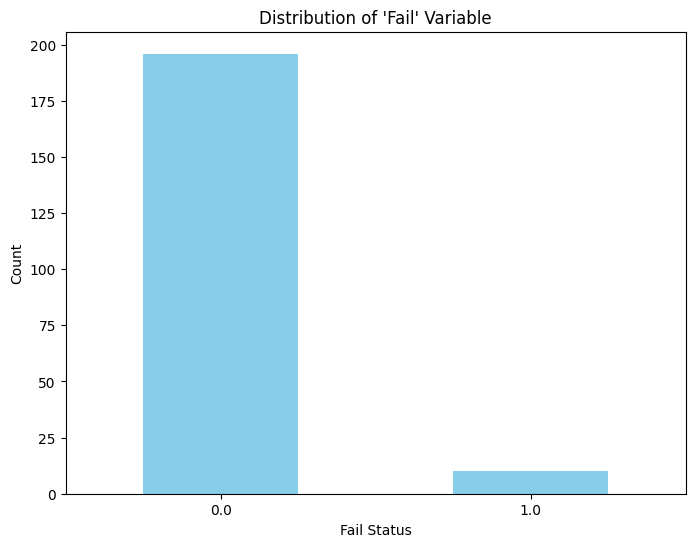

In [110]:
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'filtered_df'

# 1. Summary Statistics
print("Summary Statistics for 'Fail' variable:")
print(filtered_df['Fail'].value_counts(normalize=True) * 100)  # Display percentages

# 2. Visualizations
plt.figure(figsize=(8, 6))
filtered_df['Fail'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of 'Fail' Variable")
plt.xlabel('Fail Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [252]:
variables_of_interest = ['FundOutflowRatio','Fail', 'Lag_1YrRet', 'Log_AvgMemBal']

summary_statistics = filtered_df[variables_of_interest].describe()
print(summary_statistics)


       FundOutflowRatio        Fail  Lag_1YrRet  Log_AvgMemBal
count        337.000000  337.000000  202.000000     337.000000
mean           0.529546    0.029674    0.071480      24.926328
std            0.210481    0.169938    0.116786       3.513881
min            0.000000    0.000000   -0.585000       0.000000
25%            0.423717    0.000000   -0.013000      24.783709
50%            0.512016    0.000000    0.019000      25.493950
75%            0.663298    0.000000    0.158000      26.143801
max            1.000000    1.000000    0.846000      27.775121


# Annual Dataset - Fees Regression

## Importing Data

In [238]:
excel_file_path = 'Annual_simplified.xlsx'

all_dfs = pd.read_excel(excel_file_path, sheet_name=None)

In [239]:
print("Worksheet names:", list(all_dfs.keys()))

Worksheet names: ['Fees', 'Fees_Merged', 'Fees_Non_Merged', 'Financial_Performance', 'Financial_Merged', 'Financial_Non_Merged', 'Fund_Profile', 'Fund_Profile_Merged', 'Fund_Profile_Non_Merged']


In [242]:
Fees_Merged = all_dfs['Fees_Merged']
Fees_Non_Merged = all_dfs['Fees_Non_Merged']
Profile_Merged = all_dfs['Fund_Profile_Merged']
Profile_Non_Merged = all_dfs['Fund_Profile_Non_Merged'] 

In [243]:
# Merge Financial dataframes
merged_fees = pd.concat([Fees_Merged, Fees_Non_Merged], ignore_index=True)

# Merge Fund Profile dataframes
merged_profile = pd.concat([Profile_Merged, Profile_Non_Merged], ignore_index=True)

# Fill NaN values in the columns 'Merger', 'Merged', and 'Acquirer' with 0
merged_fees[['Merger', 'Merged', 'Acquirer']] = merged_fees[['Merger', 'Merged', 'Acquirer']].fillna(0)

merged_profile[['Merger', 'Merged', 'Acquirer']] = merged_profile[['Merger', 'Merged', 'Acquirer']].fillna(0)


In [253]:
merged = pd.merge(merged_fees, merged_profile, on=['Period', 'Fund name', 'ABN'])

In [255]:
rename_columns = {
    'Merger_x': 'Merger',
    'Merged_x': 'Merged',
    'Acquirer_x': 'Acquirer',
    'Fund type_x': 'Fund type',
    'TtlAcc_x': 'TtlAcc', 
}

merged = merged.rename(columns=rename_columns)

In [257]:
merged.columns

Index(['Period', 'Fund name', 'ABN', 'Merger', 'Merged', 'Acquirer',
       'Fund type', 'TtlAcc', 'TtlFees', 'InvFees', 'InvFPrp', 'AdmFees',
       'AdmFprp', 'AdvFees', 'AdvFPrp', 'InsFees', 'InsFPrp', 'ExtFees',
       'ExtFPrp', 'SwtFees', 'SwtFPrp', 'OthFees', 'OthFPrp', 'ActFees',
       'ActFPrp', 'Merger_y', 'Merged_y', 'Acquirer_y', 'Fund type_y',
       'TtlAst', 'PrcAst', 'InvExpR', 'OprExpR', '1YrRet', '5YrRet', '10YrRet',
       'TtlAcc_y', 'GrwAcc'],
      dtype='object')

In [261]:
merged['Log_TtlAcc'] = np.log(merged['TtlAcc'] + 1)

merged['Log_TtlAst'] = np.log(merged['TtlAst'] + 1)

In [268]:
#Total Fees Paid ($)

import statsmodels.api as sm

# Extract dependent and independent variables from df_quarterly
Y = merged['TtlFees']
X = merged[['Merger', 'Log_TtlAcc','1YrRet', 'Log_TtlAst']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X).fit()

# Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                TtlFees   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     68.46
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           7.55e-53
Time:                        19:09:45   Log-Likelihood:                -17954.
No. Observations:                1368   AIC:                         3.592e+04
Df Residuals:                    1363   BIC:                         3.594e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -8.29e+04   1.03e+04     -8.075      0.0

In [267]:
#Investment Fees Paid as proportion of total fees (%)

# Extract dependent and independent variables from df_quarterly
Y = merged['InvFPrp']
X = merged[['Merger', 'Log_TtlAcc','1YrRet', 'Log_TtlAst']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                InvFPrp   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     19.47
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.35e-15
Time:                        19:09:24   Log-Likelihood:                 51.210
No. Observations:                1368   AIC:                            -92.42
Df Residuals:                    1363   BIC:                            -66.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0147      0.020     -0.745      0.4

In [266]:
#Admin Fees Paid as proportion of total fees (%)

# Extract dependent and independent variables from df_quarterly
Y = merged['AdmFprp']
X = merged[['Merger', 'Log_TtlAcc','1YrRet', 'Log_TtlAst']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                AdmFprp   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     60.60
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.74e-47
Time:                        19:08:44   Log-Likelihood:                -378.68
No. Observations:                1368   AIC:                             767.4
Df Residuals:                    1363   BIC:                             793.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1748      0.027      6.466      0.0

In [271]:
#Activity Fees Paid as proportion of total fees (%)

# Extract dependent and independent variables from df_quarterly
Y = merged['AdvFees']
X = merged[['Merger', 'Log_TtlAcc','1YrRet', 'Log_TtlAst']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                AdvFees   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     11.47
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.70e-09
Time:                        19:11:06   Log-Likelihood:                -15810.
No. Observations:                1368   AIC:                         3.163e+04
Df Residuals:                    1363   BIC:                         3.166e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6891.1064   2141.253     -3.218      0.0

## Returns Regression

In [279]:
# Extract dependent and independent variables from df_quarterly
Y = merged['1YrRet']
X = merged[['Merged', 'PrcAst', 'Log_TtlAcc', 'Log_TtlAst']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 1YrRet   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     59.80
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           1.44e-46
Time:                        11:18:15   Log-Likelihood:                 1969.7
No. Observations:                1368   AIC:                            -3929.
Df Residuals:                    1363   BIC:                            -3903.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0062      0.005      1.269      0.2

In [284]:
# Extract dependent and independent variables from df_quarterly
Y = merged['1YrRet']
X = merged[['Merged', 'PrcAst', 'TtlAcc', 'TtlAst']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 1YrRet   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     16.79
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           1.92e-13
Time:                        11:19:23   Log-Likelihood:                 1892.0
No. Observations:                1368   AIC:                            -3774.
Df Residuals:                    1363   BIC:                            -3748.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0442      0.002     19.792      0.0

In [297]:
# Extract dependent and independent variables from df_quarterly
Y = merged['1YrRet']
X = merged[['Merged', 'Log_TtlAcc', 'Log_TtlAst']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Set up and run the regression model
model = sm.OLS(Y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 1YrRet   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     69.91
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           4.68e-42
Time:                        21:17:35   Log-Likelihood:                 1957.0
No. Observations:                1368   AIC:                            -3906.
Df Residuals:                    1364   BIC:                            -3885.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0041      0.005      0.835      0.4

In [289]:
variables_of_interest = ['1YrRet','Log_TtlAcc', 'Log_TtlAst', 'TtlFees' ]

summary_statistics = merged[variables_of_interest].describe()
print(summary_statistics)

            1YrRet   Log_TtlAcc   Log_TtlAst       TtlFees
count  1368.000000  1368.000000  1368.000000  1.368000e+03
mean      0.055875     8.104784    13.276699  5.507857e+04
std       0.062188     4.617522     4.499865  1.328808e+05
min      -0.142000     0.000000     0.000000  0.000000e+00
25%       0.005750     6.740517    12.617769  1.328750e+03
50%       0.064000     9.745205    14.410196  7.528000e+03
75%       0.093000    11.362064    15.863418  3.618000e+04
max       0.889000    14.872005    19.420387  1.029310e+06
